In [1]:
import json

# Function to load JSON file
def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
    return data

# Example usage
file_path = "parsed_strace_output.txt.json"  # Replace with your JSON file path
json_data = load_json(file_path)

#print(json_data[0:10])  # Print the loaded JSON data

In [3]:
syscalls = []

for i in json_data:
  syscalls.append(i['Syscall'])

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

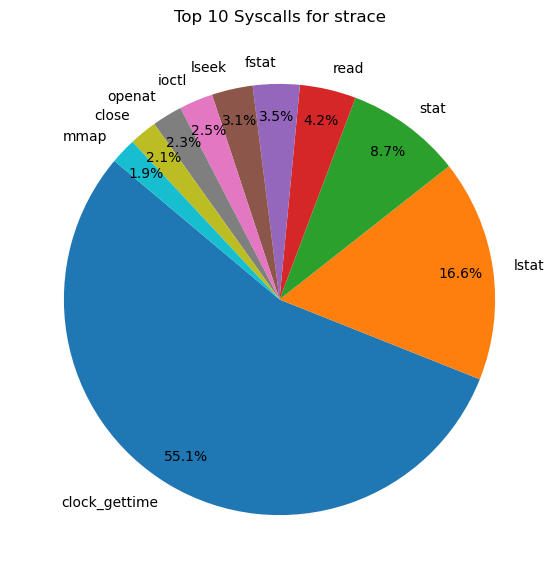

In [23]:
data = Counter(syscalls)
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True)[:10])
labels = list(sorted_data.keys())
values = list(sorted_data.values())

# Creating the pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140,pctdistance=0.85)
plt.title("Top 10 Syscalls for strace")
plt.show()

In [5]:
i = 0
lst = []
window = 250
while i + window < len(syscalls):
  lst.append(Counter(syscalls[i:i+window]).most_common(1)[0][0])
  i += window

In [6]:
lst

['rt_sigaction',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'mmap',
 'clock_gettime',
 'clock_gettime',
 'clock_gettime',
 'clock_gettime',
 'brk',
 'brk',
 'sched_setaffinity',
 'sched_setaffinity',
 'read',
 'read',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'munmap',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'read',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',

In [7]:
# unique_syscalls = list(set(lst))
# syscall_indices = [unique_syscalls.index(s) for s in lst]


# plt.figure(figsize=(10, 5))
# plt.plot([i for i in range(len(syscall_indices))], syscall_indices, marker='o', linestyle='-', markersize=5, label="Syscalls")


# plt.yticks(range(len(unique_syscalls)), unique_syscalls) 
# plt.xlabel("Atomic Step")
# plt.ylabel("Syscall")
# plt.title("Syscall Events over Step (200 Step Window)")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.xticks(rotation=45) 
# plt.legend()


# plt.show()

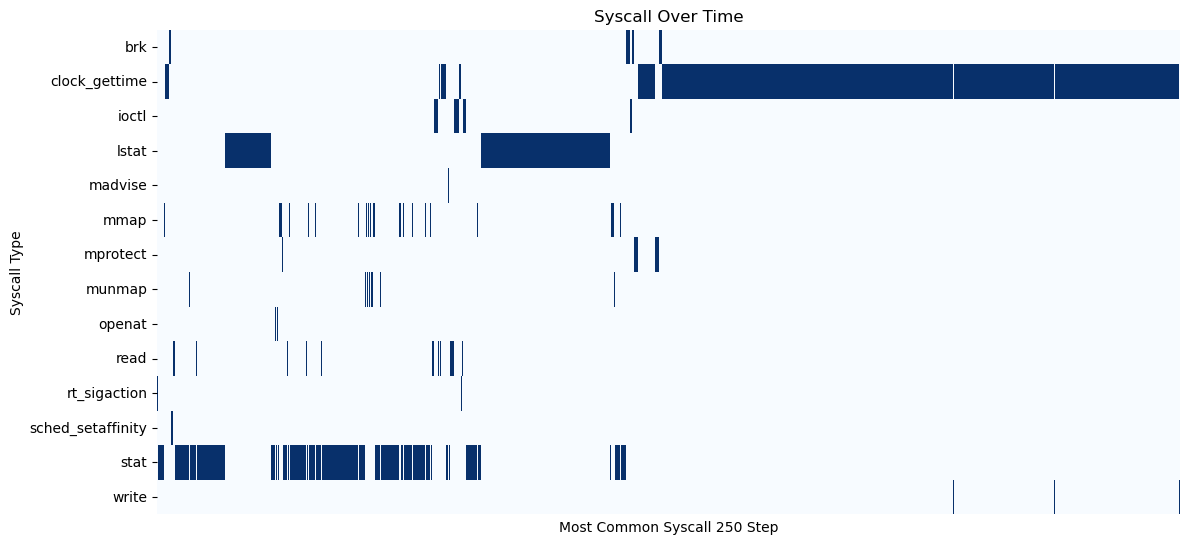

In [20]:
import seaborn as sns
import numpy as np

unique_syscalls = sorted(list(set(lst)))
time_steps = len(lst)
heatmap_data = np.zeros((len(unique_syscalls), time_steps))

for i, syscall in enumerate(lst):
    syscall_index = unique_syscalls.index(syscall)
    heatmap_data[syscall_index, i] = 1  

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', cbar=False, yticklabels=unique_syscalls)
plt.xlabel("Most Common Syscall 250 Step")
plt.ylabel("Syscall Type")
plt.title("Syscall Over Time")
plt.tight_layout()
plt.xticks([])
plt.show()